In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
c=pd.read_csv('~/git/BD/GOC/arquivo_com_ataque.csv')
c=c.sample(10**4)

In [3]:
c=c.sort_values('hora').reset_index(drop=True)

In [4]:
c.hora=pd.to_datetime(c.hora).astype(int)

In [5]:
cg=c.groupby(by=['hora']).ip.count().reset_index()

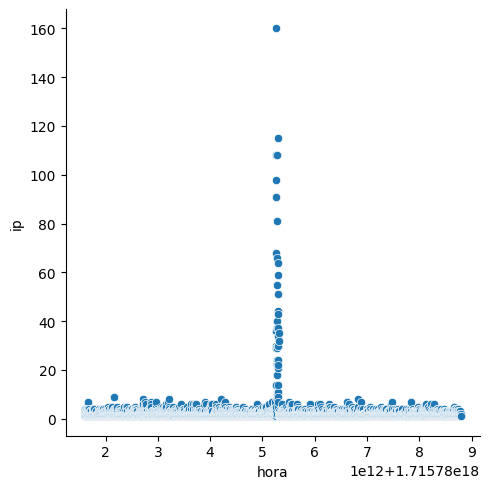

In [6]:
sns.relplot(data=cg,x='hora',y='ip')

In [7]:
ip_max_ind=cg[cg.ip==cg.ip.max()].index[0]

In [8]:
cg.ip.mean()

2.204099625303064

In [9]:
cg=cg.reset_index()

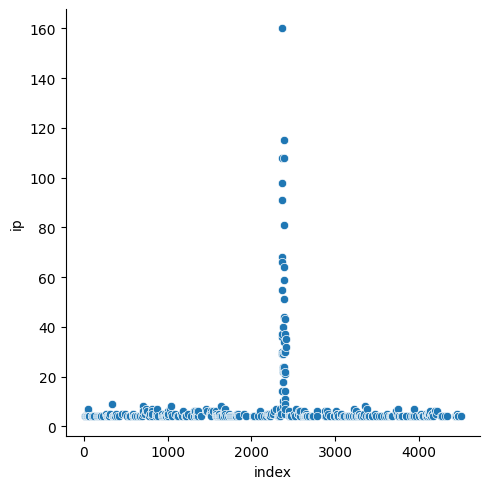

In [10]:
atack=cg[cg.ip>3]
sns.relplot(data=atack,x='index',y='ip')

In [11]:
cg=0

In [12]:
atack=atack[atack.index>380]

In [13]:
atack=atack.assign(atack=1)

In [14]:
c=c.merge(atack[['hora','atack']], how='outer')

In [15]:
c.loc[c.atack.isna(),'atack']=0

In [16]:
atack=0

In [17]:
c=c.fillna(0)

In [18]:
c=c.drop(columns=['tamanho_resposta'])

In [19]:
c.status_code=c.status_code.astype('object')
c=pd.concat([
    c.select_dtypes(exclude='object'),
    c.select_dtypes(include='object').astype('category')
],axis=1)

In [20]:
c=pd.get_dummies(c, prefix_sep='~')

In [21]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC()

In [22]:
from sklearn.model_selection import train_test_split as tts

In [23]:
train, test=tts(c,test_size=.2)

In [24]:
c=0

In [25]:
X_train=train.drop(columns=['atack','hora'])
y_train=train.atack

In [26]:
train=0

In [27]:
X_test=test.drop(columns=['atack','hora'])
y_test=test.atack

In [28]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
test_pred=test.assign(atack_pred=RFC.predict(X_test)).assign(atack=y_test)
test_pred

,hora,tamanho_request,atack,ip~1.55.6e2f0a17660adbae0ecc69e239037b18361f1e9d2d8ad23c3587dabc58b5cbcf.767e9a8f06c45378273eafbb5732bdecdf212eba3826064dfefef0bb12ec0227,ip~100.24.1bf2631c5b91a5aa54156081513aa3610649a1ada816b8062696cb57351c6c56.2f8762c96a00a65cec7b0a05c683fb86eac8ec69512f5c0e254eedeff8fb9edb,ip~100.24.3005d265d2c14b1b2798b5b6e48f46ef44c4ea4bff1f99fb88e1a94cb51c7362.677443da11f45fd22a3c403bb1b539e57d3ce4420fdba23bd953fcfa030d5ecd,ip~101.99.e289b19b6f5fb0eff47d7b58fed6d691cd90479966cff8c08efaea6723629a0f.bfaf63ea6994c912310512920e5139421974b753df2a01fa5dc6da76d5f94c6f,ip~102.141.fcdd41a1c55ebbee5fc1d52be4e3905b5dae8dd65dfe5610837cd736d8f15fbc.75ce2c5823ed9cab9c7ac893bac125208ebcb668394d85ae63d2320e68d3bfd0,ip~102.159.70adadb78f6ef8a3c888d476b0f6466e253a44e522cfdb4b3f3e3d3ce46293a5.4b07cbdfdc00fa8a559378cd55a9e8b179825ac1f09332b8ce010309efc7338a,ip~102.170.008f72b5bf513df2ad32607eb4702379744e218826999f247700fd2410f1abbb.34da0fc4b0b37a259fb808d9a6215fbeee77f78e2596a2599b4e8d1480c67ca5,...,fingerprint3~e5ee7f9194bdd334a14535bb657bc77117d108be75529341e17609905b887f85,fingerprint3~e875fe5917569f0d3a61c4d3a42cd50b96498e0b19cc64fb767730a585b7c08c,fingerprint3~e8d3919c799d9c3fc5e4e22cc2d29735ba3b296072757ce105917b72379537ff,fingerprint3~efb97d06505b584dc597a5a960d7973b35eb7507469ec3a3aecb9d1af60d4a62,fingerprint3~eff2f4112ee9c7aa38f91bfea9eec494635cbb02e4fe8e6e371bd783a8f394c9,fingerprint3~f73f1b05dad06fe945a0818068b85ff6885be4ce0c1b2e836d586af940917ba8,fingerprint3~f8149b92960636b72681374e22ae5dbae7108e7af6d79ee4d5f67012ec1129d9,fingerprint3~fb27ce2d2d30dfdd0beb299c8d8a326ec135e064e616ddb772b963c34fc832f3,fingerprint3~fe58a3a7430e56fc7cae5d9bfb59ab5c7a40565f3f835cd76e7a216215a879e0,atack_pred
9279,1715788114000000000,292,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.0
8963,1715787848000000000,2090,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.0
7524,1715786443000000000,46,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.0
5296,1715785282000000000,18,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
4654,1715785264000000000,509,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,1715785290000000000,28,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
8597,1715787471000000000,826,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.0
7007,1715785979000000000,71,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.0
7089,1715786054000000000,48,1.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.0


In [30]:
from sklearn import metrics

In [31]:
metrics.accuracy_score(test_pred.atack,test_pred.atack_pred)

0.8835

In [32]:
metrics.precision_score(test_pred.atack,test_pred.atack_pred)

0.9348739495798319

In [33]:
metrics.recall_score(test_pred.atack,test_pred.atack_pred)

0.6877897990726429

In [34]:
test_pred=pd.concat([test_pred.select_dtypes(exclude='bool'),pd.from_dummies(test_pred.select_dtypes('bool'),sep='~')],axis=1)

In [35]:
tpg=test_pred.groupby('hora').ip.count().reset_index()

In [36]:
tpg=tpg.merge(test_pred[['hora','atack_pred']].drop_duplicates())

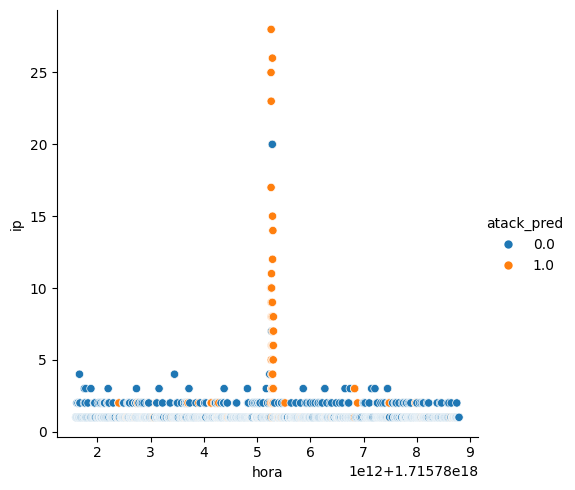

In [37]:
sns.relplot(data=tpg,x='hora',y='ip',hue='atack_pred')